In [21]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from scipy.signal import find_peaks
from scipy.stats import linregress
import json

In [22]:
class Spek():
    def __init__(self,freq,cut=False):
        path=f"data/dopplerfrei/{freq}freq.dat"
        path2=f"data/dopplerfrei/{freq}freq_blende.dat"
        self.time, self.U_piezo, self.U_fp, self.U_spek, self.intensity = np.genfromtxt(path).T
        self.time2, self.U_piezo2, self.U_fp2, self.U_spek2, self.intensity2 = np.genfromtxt(path).T
        # Piezo-Spannung muss noch mit vier multipliziert werden.
        self.U_piezo = 4 * self.U_piezo
        self.U_piezo2 = 4 * self.U_piezo2

        # Falls cut == True, werden die Daten auf eine steigende Flanke der Piezo-Spannung zugeschnitten.
        if cut:
            # Finden des Minimums und Maximums
            # Bei mehreren Minima und Maxima ist die hardgecodete Auswahl über den letzten Index echt unschön...
            min = find_peaks(-1.0*self.U_piezo,width=2000)[0][0]
            max = find_peaks(self.U_piezo,width=2000)[0][-1]

            self.time = self.time[min:max+1]
            self.U_piezo = self.U_piezo[min:max+1]
            self.U_fp = self.U_fp[min:max+1]
            self.U_spek = self.U_spek[min:max+1]
            self.intensity = self.intensity[min:max+1]

            min2 = find_peaks(-1.0*self.U_piezo2,width=2000)[0][0]
            max2 = find_peaks(self.U_piezo2,width=2000)[0][-1]

            self.time2 = self.time2[min2:max2+1]
            self.U_piezo2 = self.U_piezo2[min2:max2+1]
            self.U_fp2 = self.U_fp2[min2:max2+1]
            self.U_spek2 = self.U_spek2[min2:max2+1]
            self.intensity2 = self.intensity2[min2:max2+1]

    
    def plot(self,title=None):
        fig = plt.figure(figsize=(7, 5))
        gs = GridSpec(8, 5)
        fig1 = fig.add_subplot(gs[:, :])
        # fig1.set_title(f"Laser")
        fig1.set_ylabel("Kerr Winkel in $^°$")
        fig1.set_xlabel("B in mT")
        # fig1.set_xlim(-5,185)
        # fig1.set_ylim(0,9.5)
        plt.tight_layout()
        plt.plot(self.time,self.U_spek,c="C0")
        plt.plot(self.time2,self.U_spek2,c="C1")
        plt.show()

In [23]:
with open('kali.txt') as json_file:
    kali = json.load(json_file)
print(kali)

{'0': [-0.0006831583189536933, 780.247753204327], '3': [-0.0006593473937488854, 780.247552537188], '4': [-0.0006557151961520067, 780.2473265396443], '5': [-0.0006487626584672954, 780.2472880580533], '6': [-0.0006303134830736428, 780.2472357235326]}


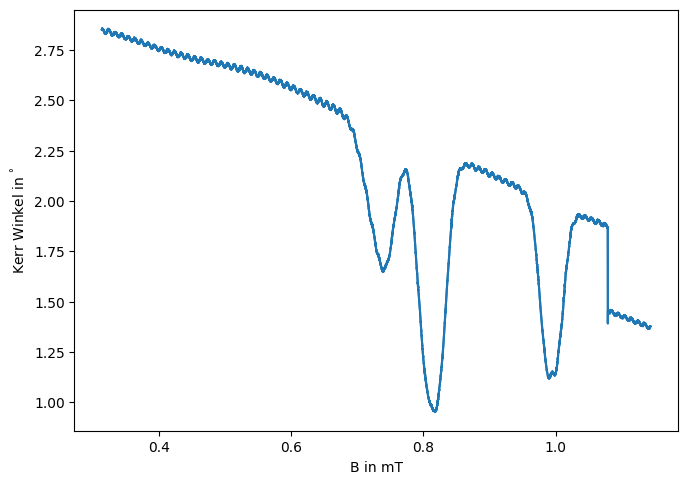

In [24]:
spek3=Spek(4,cut=True)
spek3.plot()